In [3]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math

f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_xsec_example.root")
f.keys()

h = f['p8_ee_Zmumu_ecm91/m_inv;1'].to_hist()
htau = f['p8_ee_Ztautau_ecm91/m_inv;1'].to_hist()

#hep.histplot([htau,h], stack=True)
#plt.yscale("log")

#y,x = h.to_numpy()
#ytau,xtau = htau.to_numpy()

#print("Z->mumu Events = ", sum(y))
#print("Z->tautau Events = ", sum(ytau))

Z->mumu Events =  201227905310.39993
Z->tautau Events =  107177559.30000076


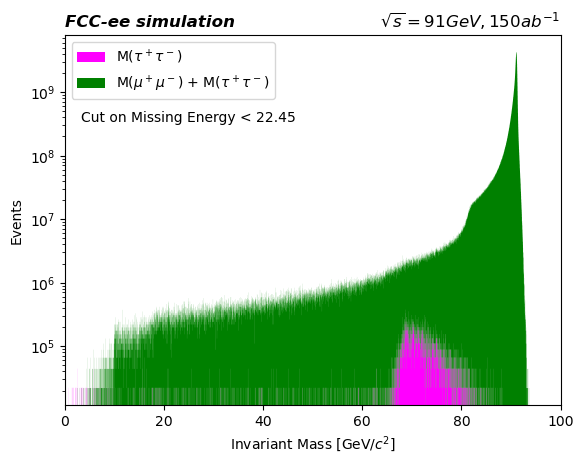

In [4]:
wmu = 150*1462.08/10
wtau = 150*1476.58/10

hist = h*wmu
histtau = htau*wtau

hep.histplot([htau,h], stack = True, label = [r"M($\tau^+ \tau^-$)", r"M($\mu^+ \mu^-$) + M($\tau^+ \tau^-$)"], 
             color = ["magenta", "green"], histtype = "fill")
plt.yscale("log")
plt.xlim(0,100)
#plt.title("Normalized Invariant Mass: Muon and Tau")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
plt.legend(loc = "upper left")
plt.xlabel(r"Invariant Mass [GeV/$c^2$]")
plt.ylabel("Events")
plt.figtext(0.15, 0.7, "Cut on Missing Energy < 22.45")
#plt.savefig("images/norm_inv_mass_Z_mumu_tau_tau_filtere_no.png")

print("Z->mumu Events = ", sum(h.values()))
print("Z->tautau Events = ", sum(htau.values()))

Z->mumu Events =  138176.49497980822
Z->tautau Events =  73.5952573860009
We have 1456310.6796116484 times more events at FCCee w.r.t. LEP


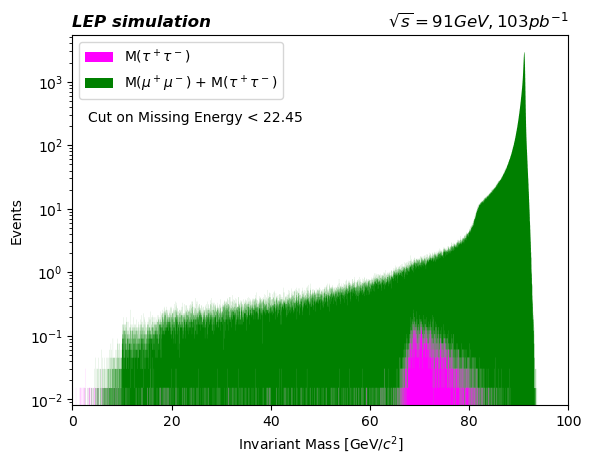

In [22]:
new_wmu = 103*1462.08/10000000
new_wtau = 103*1476.58/10000000

new_mu = h*new_wmu
new_tau = htau*new_wtau

hep.histplot([new_tau,new_mu], stack = True, label = [r"M($\tau^+ \tau^-$)", r"M($\mu^+ \mu^-$) + M($\tau^+ \tau^-$)"], 
             color = ["magenta", "green"], histtype = "fill")
plt.yscale("log")
plt.xlim(0,100)
#plt.title("Normalization After Optimal Cut on Invariant Mass: Muon and Tau")
plt.title(r"$\sqrt{s} = 91 GeV, 103 pb^{-1}$", loc = "right")
plt.title("LEP simulation", loc = "left", weight = "bold", style = "italic")
plt.legend(loc = "upper left")
plt.xlabel(r"Invariant Mass [GeV/$c^2$]")
plt.ylabel("Events")
plt.figtext(0.15, 0.7, "Cut on Missing Energy < 22.45")
plt.savefig("images/new_norm_inv_mass_Z_mumu_tau_tau_filtere_no.png")

print("Z->mumu Events = ", sum(new_mu.values()))
print("Z->tautau Events = ", sum(new_tau.values()))

dif_mu = sum(hist.values())/sum(new_mu.values())
dif_tau = sum(histtau.values())/sum(new_tau.values())

print("We have", dif_mu, "times more events at FCCee w.r.t. LEP")